# <font color='hotblue'>Spring AI Programaria - Anotações de estudo</font>

## Workshop Primeiro Projeto de Machine Learning - by Fernanda Wanderley

Este notebok é destinado as anotações de estudos realizados no 1 º Workshop do SpringAI 2020, os links para os materiais utilizados encontram-se ao final do notebook. Meus agradecimentos a Fernanda Wanderley por desenvolver um workshop muito produtivo.

# <font color='lightseagreen'>Instalando e Importando Pacotes</font>

In [2]:
# Caso não tenha instalado os pacotes necessários retire a '#' que precede cada uma das linhas abaixos e execute esta célula.
#!pip install pandas
#!pip install -U scikit-learn
#!pip install matplotlib
#!pip install seaborn
!pip install plotnine

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\esousasilvaj\\Anaconda3\\Lib\\site-packages\\~andas\\_libs\\algos.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5


In [5]:
# Importando os pacotes necessários para o nosso trabalho neste notebook.


from scipy import stats
# 'pandas' é um pacote utilizado para trabalhar com os dados em forma de dataset (armazenamento de dados em um tipo de tabela)
import pandas as pd
# 'matplotlib' é um pacote utilizado para realizar a construção/plotagem de gráficos
import matplotlib.pyplot as plt
# 'seaborn' é um pacote também utilizado para realizar plotagem de gráficos
import seaborn as sns
# 'plotnine' é um pacote p/ construção de gráficos | Idéia do código abaixo: Do 'pacote plotline' importe 'todas as funções (*)'
from plotnine import *
# 'numpy' é um pacote python utilizado para cálculo numérico.
import numpy as np



# a partir do pacote sklearn.model_selection, importamos a função de separação de dados para treinamento.
#from sklearn.model_selection import train_test_split
# a partir do pacote sklearn.preprocessing, importamos a função de padronização escalar de dados.
#from sklearn.preprocessing import StandardScaler
# a partir do pacote sklearn.linear_model, importamos a função de Regressão Logística.
#from sklearn.linear_model import LogisticRegression
# a partir do pacote sklearn, importamos a função de metricas
#from sklearn import metrics
# pacote utilizado para salvar o modelo treinado
#import pickle

# <font color='mediumpurple'>Carregando e Visualizando o Dataset</font>

In [11]:
# Carregando os dados a serem utilizados na memória de trabalho através da função read_csv do pacote pandas (pd) e salvando-a
# como um objeto de nome 'df'.
df = pd.read_csv('movie_metadata.csv')

In [10]:
# A primeira a coisa a se fazer após importar os dados é realizar a impressão do mesmo para que possamos visualizar seu
# conteúdo e começar a pensar na forma de análise, para tal utilizamos a função head() que imprime o cabeçalho (primeiras
# linhas do dataframe). Note que a função head() é dada como um método do objeto (df) onde salvamos o dataframe anteriormente.
df.head()

AttributeError: 'NoneType' object has no attribute 'items'

   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1               

In [8]:
# Para visualizarmos o shape (forma) do nosso dataset utilizamos o método shape:
df.shape

(5043, 28)

A célula acima retorna: (nº_linhas, nº_colunas) do dataset.

In [7]:
# Utilizando o método '.dtypes' podemos visualizar o tipo de cada variável (coluna) contida no dataframe
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [8]:
# Observando o resultado acima, podemos observar que há 3 tipos de variáveis no nosso dataset:
# - int64: Que são variáveis de números inteiros
# - float64: Sendo variáveis de números de ponto flutuante (possuem vírgula devido aos decimais)
# - object: Neste caso são variáveis categóricas (algo como nomes/rótulos, ex: Sim ou Não, Quente ou Frio ou Normal) 

In [9]:
# A função list(), 'lista' as variáveis/parâmetros de um dado objeto, neste caso 'df.columns', sendo os variáveis do nosso df.
list(df.columns)

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

# <font color='mediumpurple'>Preparação de Dados</font>

In [11]:
# Para retirarmos então a coluna desnecessária em nosso modelo utilizamos o método ".drop(). Será utilizado 3 parâmetros neste
# caso, sendo eles:
# - nome da coluna a ser retirada ('movie_imdb_link')
# - axis = 1 (significa a orientação dos dados a serem retirados, no caso 1 refere-se a coluna)
# - inplace = True (Significa que o drop será realizado no próprio objeto df, ao invés de criar um novo objeto sem tal coluna)
df.drop('movie_imdb_link', axis = 1, inplace = True)

In [12]:
# Através do método '.value_counts()' podemos visualizar os valores contido em uma dada coluna passada como parâmetro
df['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [13]:
# Há algumas células anteriores vimos que o tipo de variável contida na coluna color é do tipo object ou seja categóricas, 
# podemos comprovar tal afirmação agora ao observar tal variáveis que a coluna color (cor), sendo elas color (colorido), onde
# foram observados 4815 casos e a variável Black_and_White (Preto e Branco), onde observou-se 209 casos.

In [14]:
# Analisando um pouco sobre a distribuição das variáveis encontradas em color:

# Sabendo que há duas variáveis na coluna color, usaremos cada uma delas para salvar sua respectiva quantidade de observações
color, bw = df['color'].value_counts() 

# A partir da quantidade de cada variável obtemos o valor total através da soma destas.
total_casos = color + bw

# Então imprimimos as observaçoes realizadas para análise.
print('Total de casos:', total_casos)
print('Percentagem Color:', (color / total_casos) * 100)
print('Percentagem B&W:', (bw / total_casos) * 100)

Total de casos: 5024
Percentagem Color: 95.83996815286623
Percentagem B&W: 4.160031847133758


In [15]:
# A título de comentário, poderíamos ter realizado a mesma operação anterior de várias outras formas, como é o caso do comando
# abaixo que já nos retorna o valor em percentagem:

df['color'].value_counts(normalize=True) * 100

# Lembre-se: Há várias maneiras de se realizar a mesma tarefa utilizando ferramentas diferentes, é improvável que se conheça
# todas e o importante é solucionar o problema.

Color               95.839968
 Black and White     4.160032
Name: color, dtype: float64

In [16]:
# Podemos observar que o a percentagem de observações casos 'Color' é muito maior do que os casos (Black and White), sendo
# assim essa coluna não representa aplicabilidade para nosso modelo preditivo, pois uma vez que praticamente todas as amostras
# são coloridas, sua influência na variável a ser prevista (imdb_score) é quase nula, portanto iremos retirar também tal coluna.

In [17]:
# Retirando então a coluna color:
df.drop('color', axis = 1, inplace = True)

### <font color='orange'>Dados NA (Nulos ou Faltantes)</font>

In [18]:
# Uma observação muito importante a respeito da criação de um modelo preditivo é sobre a questão de dados nulos ou faltantes, 
# pois no geral os métodos utilizados para criar um modelo não lidam bem com esse tipo de dado e podendo assim levar a um
# problemas no modelo. Portanto é necessário sempre verificar a existência de tais observações e se encontradas devem ser
# devidamente tratadas, sejam com a exlusão de tal linha de dado ou atribuição de valor baseado em algum critério de decisão
# (o critério mais simples é o de atribuição do valor médio observado, porém nem sempre será o melhor).

In [19]:
# Para retornar quais colunas possuem valores faltantes utilizamos o método '.isna()' que retorna se é True ou False a 
# existência de dados missings (faltantes), seguido pelo método '.any' que retorna True caso haja pelo menos um valor True em 
# uma dado eixo de referência (neste caso vertical/colunas). Desta forma teremos informações sobre quais colunas possuem 
# valores faltantes
df.isna().any()

director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                       False
actor_1_name                  True
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                   False
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [20]:
# Com o resultado acima podemos observar que nem todas as colunas possuem os devidos valores, ou seja possuem valores faltantes 
# (missings), como é o caso da coluna 'director_name', onde nem todos os filmes possuem o valor 'director_name(nome_do_diretor)'

In [22]:
# Agora que sabemos existem valores faltantes, precisamos então saber quantos ocorridos deste tipo estão presente em cada
# variável dos dados. Para isso utilizaremos o método '.isna()' seguido do método '.sum()', que realiza a soma por variável
# do número de casos faltantes observados.
df.isna().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [23]:
# Mediantes os dados, podemos perceber que há algumas variáveis que possuem muitos valores faltantes como é o caso de 'gross (
# lucro_do_filme)', onde os dados faltantes representam cerca de 17.53 %, o que representa um problema. Neste caso retirar as
# linhas com dados missing devido a esta variável se torna inviável pois representaria uma perca muito grande ao nosso conjunto
# de dados

In [24]:
# Para as variáveis que possuem poucos casos missing, podemos realizar a retirada das linhas onde ocorrem tais casos, para tal,
# utilizamos o método '.dropna()', onde passamos como parâmetro 'axis = 0' (que neste caso é 0 implicando orientação por linha),
# 'subset = []' (onde mencionamos a qual/quais colunas queremos aplicar a função de remoção) e 'inplace' que já é conhecido.
df.dropna(axis = 0, subset = ['director_name', 'num_critic_for_reviews',
                               'duration','director_facebook_likes','actor_3_facebook_likes',
                               'actor_2_name','actor_1_facebook_likes','actor_1_name','actor_3_name',
                               'facenumber_in_poster','num_user_for_reviews','language','country',
                               'actor_2_facebook_likes','plot_keywords', 'title_year'],inplace=True)

In [25]:
# Para termos ideia do que está acontecendo com o nosso dataset, utilizaremos novamente o método '.shape'. Perceba que o nosso
# dataset passou de '5043 linhas e 28 colunas' para '4737 columns e 26 rows', o que em perca de linhas de dados representa cerca
# de 6.07 %.
df.shape

(4737, 26)

In [26]:
# Como dito anteriormente, colunas como muitos valores faltantes tornam a retirada de linhas por casos encontrados inviável,
# pois representaria uma perca muito grande ao nosso dataset. Portanto precisamos pensar em uma alternativa sobre como lidar
# com esses dados, para auxiliar nessa tomada de decisão, exploraremos um pouco mais tais variáveis (colunas).

In [27]:
# A primeira variável a ser analisada será a content_rating (classificação de faixa etária), onde utilizaremos o método
# 'value_counts()' para contar quantos casos de cada valor é observado nesta coluna.
df['content_rating'].value_counts()

R            2082
PG-13        1436
PG            681
G             109
Not Rated     100
Unrated        58
Approved       55
X              13
Passed          9
NC-17           7
GP              6
M               5
TV-14           3
TV-G            3
TV-PG           1
Name: content_rating, dtype: int64

In [28]:
# Ao analisar o resultado acima, temos que, a quantidade de observações de filmes 'R (livres)' é de cerca de 46.96 % dentre 15
# possíveis casos (tal percentagem não considera os valores faltantes), portanto uma decisão viável é atribuir a classificação
# 'R' aos valores faltantes.

In [29]:
# Para tal utilizaremos a método'.fillna()' que 'preenche' os casos NA (faltantes) com o valor passado como parâmetro.
df['content_rating'].fillna('R', inplace = True)

In [30]:
# Seguindo com a análise de variáveis, agora em 'aspect_ratio'
df['aspect_ratio'].value_counts()

2.35     2311
1.85     1884
1.37       97
1.78       80
1.66       63
1.33       34
2.20       15
2.39       14
16.00       8
2.00        4
1.75        3
2.40        3
2.76        3
2.55        2
1.50        2
2.24        1
1.20        1
1.18        1
1.44        1
1.77        1
Name: aspect_ratio, dtype: int64

In [34]:
# Uma vez decidido a decisão a ser tomada com relação aos dados NA de 'aspect_ratio', faremos o preenchimento de tal valores
# com a mediana dos casos contidos nessa coluna.

# Utilizando o método '.fillna' passaremos como parâmetro o método de cálculo da mediana a partir da coluna do nosso dataset.
# A fim de controle, faremos a impressão da mediana antes da realização do preenchimento, a fim de documentar os passos.
print('O valor da mediana a ser preenchido para aspect_ratio é:', df['aspect_ratio'].median())
df['aspect_ratio'].fillna(df['aspect_ratio'].median(), inplace = True)

O valor da mediana a ser preenchido para aspect_ratio é: 2.35


In [36]:
# Faremos o mesmo trabalho de fill (preencher) com as variáveis 'budget (orçamento)' e 'gross (faturamento)'

print('O valor da mediana a ser preenchido para budget é:', df['budget'].median())
df['budget'].fillna(df['budget'].median(), inplace = True)

O valor da mediana a ser preenchido para budget é: 20000000.0


In [37]:
print('O valor da mediana a ser preenchido para gross é:', df['gross'].median())
df['gross'].fillna(df['gross'].median(), inplace = True)

O valor da mediana a ser preenchido para gross é: 26005908.0


In [38]:
# Daremos uma olhada novamente no estado de casos NA do nosso dataset, assim podemos verificar se já resolvemos todos os casos
# ou se ainda existe algum a ser resolvido.
df.isna().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [39]:
# Finalmente resolvemos todos os casos de valores NA (Faltantes/Missings).

### <font color='orange'>Dados Duplicados</font>

In [40]:
# Seguindo adiante, um caso que também pode nos gerar problema na criação do modelo preditivo é o de dados duplicados.
# O que buscamos para o modelo são atributos que influênciem na variabilidade do nosso alvo (targe) a ser previsto, quando
# possuimos vários valores duplicados o nosso modelo será enviesado para estas variáveis (inclinado em direção a estas).

# Para retornar se há ou não tais ocorrências, o método '.duplicated()' seguido de '.sum' para somar as ocorrências.
df.duplicated().sum()

42

In [41]:
# E o resultado foram 42 ocorrências. Para resolvê-las utilizaremos o método 'drop_duplicates()'
df.drop_duplicates(inplace = True)

In [42]:
# Novamente utilizando o '.shape' veremos como está o nosso dataset após todas as modificações realizadas.
df.shape

(4695, 26)

In [43]:
# Desde a última checagem fomos de '4737 linhas e 26 colunas' para '4695 e 26'. Tal modificação e consequentemente perca, ainda
# não é tão prejudicial ao modelo. Lembre-se quanto mais dados, mais exemplos o nosso modelo terá durante o treinamento e assim
# possuirá uma melhor capacidade de generalização e previsão acertiva, portanto apesar de ser necessário remoção e tratamento
# de alguns dados, deve-se ter em consideração que também representa perca de dados para aprendizado, portanto deve-se sempre
# análisar esse decorrer de perca para não chegarmos a um dataset pobre de informações.

### <font color='orange'>Análise de Relevância de Dados</font>

In [44]:
# Faremos agora uma análise em algumas colunas para buscar identificar sua possível relevância para nosso modelo, isto é se tal
# variável possui de alguma forma a poder de influenciar a nossa variável alvo (target - neste caso, a nota do imdb).

# Para tal daremos uma olhada em quais valores estão contidos na coluna language (língua)
df['language'].value_counts()

English       4405
French          69
Spanish         35
Hindi           25
Mandarin        24
German          18
Japanese        16
Russian         11
Cantonese       10
Italian         10
Portuguese       8
Korean           8
Danish           5
Swedish          4
Persian          4
Norwegian        4
Hebrew           4
Dutch            4
Arabic           3
Thai             3
Aboriginal       2
Zulu             2
Dari             2
None             2
Indonesian       2
Greek            1
Mongolian        1
Vietnamese       1
Kazakh           1
Hungarian        1
Aramaic          1
Filipino         1
Icelandic        1
Romanian         1
Dzongkha         1
Czech            1
Bosnian          1
Telugu           1
Maya             1
Polish           1
Name: language, dtype: int64

In [45]:
# Com base no resultado acima, notamos que o número de filmes em inglês (English) representam cerca de 93.83 % do total de
# observações, levando em conta que é uma variável do tipo categórica, poderíamos tomar algumas decisões, a primeira possível
# abordagem, seria a de redefinir as categorias observadas de linguagem específica para apenas duas categorias, sendo elas, 
# Inglês (English) ou Não Inglês (Non-English). Uma secunda abordagem (a qual seguiremos) é a de simplesmente excluir tal coluna
# pois ainda que reagruparmos em apenas 2 categorias, a categoria English (Inglês) ainda representaria a grande maioria dos
# casos e portanto é bem provável que tais dados não possuem relevância para a previsão do modelo, sendo assim é o que faremos.

# obs.: Pensando em um caso onde o nosso dataset possuísse um maior volume de dados com um número significante de filmes de
# outras linguas, então tal variável passaria a também ser relevante ao nosso dataset, a qual sem dúvidas seria mantida.

In [46]:
# Realizando o drop da coluna linguagem
df.drop('language', axis = 1, inplace = True)

In [47]:
# Dando uma olhada na coluna país
df['country'].value_counts()

USA               3568
UK                 420
France             149
Canada             107
Germany             96
Australia           53
Spain               32
India               27
China               24
Japan               21
Italy               20
Hong Kong           16
New Zealand         14
South Korea         12
Ireland             11
Mexico              11
Denmark             11
Russia              11
South Africa         8
Brazil               8
Norway               7
Sweden               5
Netherlands          5
Argentina            4
Iran                 4
Thailand             4
Switzerland          3
Belgium              3
West Germany         3
Israel               3
Czech Republic       3
Hungary              2
Greece               2
Taiwan               2
Romania              2
Iceland              2
Poland               2
Philippines          1
Bahamas              1
Libya                1
Nigeria              1
New Line             1
Chile                1
Soviet Unio

In [48]:
# Sobre a coluna country (país), os casos USA (estados unidos) representam cerca de 80 % dos casos observados, o que era de 
# de certa forma o esperado, uma vez que a linguagem está diretamente ligada ao país que produziu tal filme.
# Apesar de haver uma queda na majoritariedade do principal componente se comparado ao caso 'langage', também realziaremos
# a retirada desta coluna seguindo a mesma motivação do caso anterior.

In [49]:
# Realizando o drop da coluna 'country (país)'
df.drop('country', axis = 1, inplace = True)

### <font color='orange'>Análise gráfica de relação de variáveis</font>

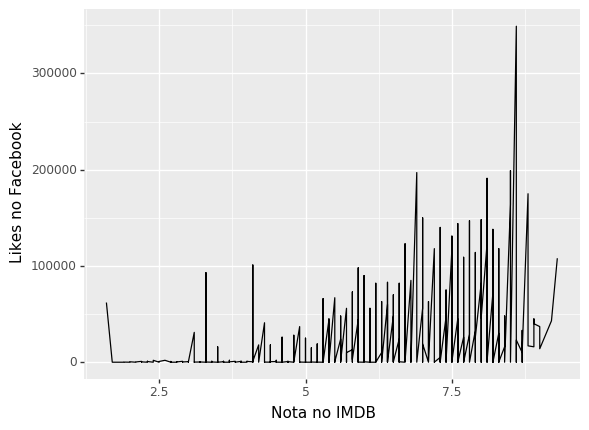

<ggplot: (-9223371949531466744)>

In [61]:
# Analisando graficamente a correlação da nota no imdb (imdb_score) e número de likes no facebook (movie_facebook_likes)
(ggplot(df) +\
    aes(x = 'imdb_score', y = 'movie_facebook_likes') +\
    geom_line() +\
    labs(tittle = 'Nota IMDB vs Likes no Facebook do filme', x = 'Nota no IMDB', y = 'Likes no Facebook')
)

### <font color='orange'>Variáveis Categóricas com Baixo Número de uma Mesma Observação</font>

In [63]:
# Faremos agora a retirada de algumas variáveis categóricas, pois como no caso da coluna de diretores, não possuimos observações
# suficientes por diretor para que haja de fato uma correlação significativa. [Iremos retirar então, director_name,
# actor_1_name, actor_2_name, plot_keywords, movie_title (o caso de movie_title é devido a tal variável raramente apresentar
# um mesmo valor, assim como tais valores categóricos sempre tendem a ser diferentes, não se consegue realizar uma inferência
# de correlação)]

In [64]:
# Retirando então as colunas
df.drop(columns = ['director_name', 'actor_1_name', 'actor_2_name', 
                   'actor_3_name', 'plot_keywords', 'movie_title'], axis = 1, inplace = True)

### <font color='orange'>Variáveis Com Alta Quantidade de Tipos Observados, Porém Poucas Observações por Tipo</font>

In [65]:
# Dando uma olhada agora nas observações da variável 'genres (gênero)'
df['genres'].value_counts()

Drama                               209
Comedy                              186
Comedy|Drama|Romance                182
Comedy|Drama                        180
Comedy|Romance                      149
                                   ... 
Drama|Film-Noir                       1
Action|Adventure|Drama|Western        1
Thriller|Western                      1
Drama|Family|Music|Musical            1
Animation|Comedy|Fantasy|Musical      1
Name: genres, Length: 875, dtype: int64

In [66]:
# Devido a alta distribuição dos dados da var genres, também faremos a retirada da mesma.
df.drop('genres', axis = 1, inplace = True)

In [69]:
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


# Hypothesis

# Hypothesis testing 1

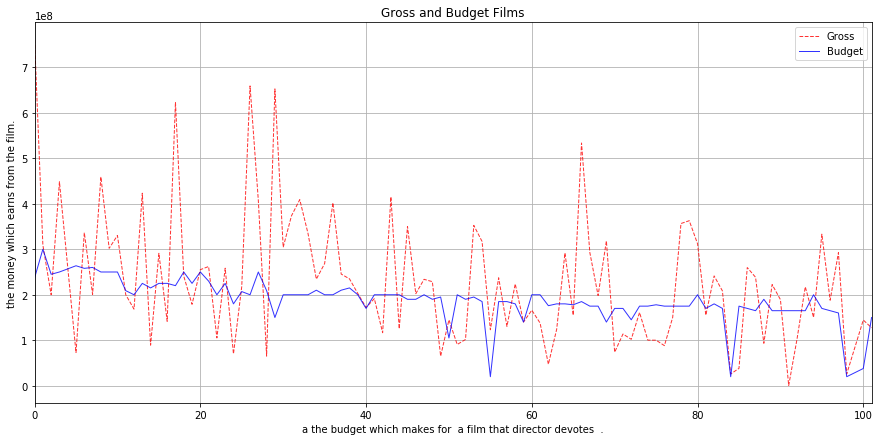

In [145]:
df2 = df.iloc[0:100]

plt.figure(figsize=(15,7))
df2.gross.plot(kind ='line',color = 'r',grid = True,alpha = 0.8,linewidth = 1,label ='Gross',linestyle = '--')
df2.budget.plot(color = 'b',grid = True,alpha = 0.8,label ='Budget',linewidth = 1,linestyle = '-')
plt.legend()
plt.xlabel('a the budget which makes for  a film that director devotes  .')
plt.ylabel('the money which earns from the film.')
plt.title('Gross and Budget Films')
plt.show()

### Null Hypothesis: 
There is no relationship between Gross and Budget
### Alternative Hypothesis:
There is relationship between Gross and Budget

In [143]:
hle = np.array(df['gross'])
ylwd = np.array(df['budget'])
stats.ttest_ind(hle, ylwd)

Ttest_indResult(statistic=2.075255727942378, pvalue=0.03799000761436705)

### Result
With p value 0.03799000761436705 smaller than 0.05, we accept the null hypothesis at 5% significance level, meaning that there is no relationship between gross and budget.

# Next Steps

The analisys now can progress with a look at correlation between all variables, to...